In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx

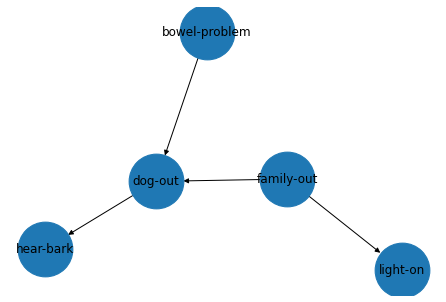

In [2]:
dog_network = BayesNet()
dog_network.load_from_bifxml('testing/dog_problem.BIFXML')
dog_network.draw_structure()

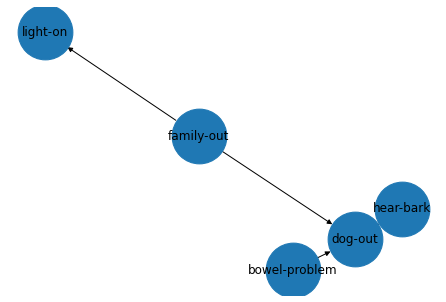

There is no path between bowel-problem and hear-bark given ['dog-out'] , therefore they are independent.


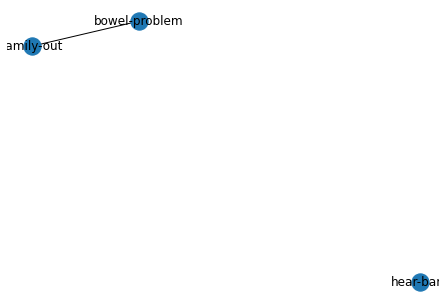

In [3]:
reasoner = BNReasoner(dog_network)
# D-Seperation
# Given three sets of variables X, Y , and Z, determine whether X is independent of Y given Z

x = 'bowel-problem'
y = 'hear-bark'
z = ['dog-out']

dog_network.draw_structure()
reasoner.d_seperation(x, y, z)
